In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 23.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 1. TF-IDF

**Algorithm**: TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus).

TF-IDF has a number of applications. It can be used as a weighting factor for:

**Information retrieval**: Variations of TF-IDF are used as a weighting factor by search engines to help understand the relevance of a page to a user’s search query

**Text mining**: TF-IDF can help quantify what a document is about, which is a central question in text mining

**User modeling**: Another application of TF-IDF involves assisting in the creation of models for user behavior and interests, which can then be used by product and content recommendation engines


# Text-Mining : TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
document1 = "It is going to rain today."
document2 = "Today I am not going outside."
document3 = "I am going to watch the season premiere."
documents = [document1, document2, document3]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Get feature names of final words that we will use to tag documents
analyze_text = tfidf_vectorizer.build_analyzer()
print(f"Tokenized words in Document 1: {analyze_text(document1)}")

# Vectorize the documents and find feature names
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print(f"\nTF-IDF Matrix representation of documents:\n{tfidf_matrix.toarray()}")

# Get vocabulary (word indexes)
word_indexes = tfidf_vectorizer.vocabulary_
print(f"\nWord indexes: {word_indexes}")

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nFeature names (terms): {feature_names}")


Tokenized words in Document 1: ['it', 'is', 'going', 'to', 'rain', 'today']

TF-IDF Matrix representation of documents:
[[0.         0.27824521 0.4711101  0.4711101  0.         0.
  0.         0.4711101  0.         0.         0.35829137 0.35829137
  0.        ]
 [0.40619178 0.31544415 0.         0.         0.53409337 0.53409337
  0.         0.         0.         0.         0.         0.40619178
  0.        ]
 [0.32412354 0.25171084 0.         0.         0.         0.
  0.4261835  0.         0.4261835  0.4261835  0.32412354 0.
  0.4261835 ]]

Word indexes: {'it': 3, 'is': 2, 'going': 1, 'to': 10, 'rain': 7, 'today': 11, 'am': 0, 'not': 4, 'outside': 5, 'watch': 12, 'the': 9, 'season': 8, 'premiere': 6}

Feature names (terms): ['am' 'going' 'is' 'it' 'not' 'outside' 'premiere' 'rain' 'season' 'the'
 'to' 'today' 'watch']


# Information Retrieval : TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Web pages
documents = [
    "TF-IDF is a numerical statistic used to reflect the importance of a word to a document in a collection or corpus.",
    "Search engines often use TF-IDF to determine the relevance of a document to a search query.",
    "The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus.",
    "In information retrieval, TF-IDF is a common technique used to weigh the importance of words in a document.",
    "A higher TF-IDF score indicates that a word is more important to a document compared to other words.",
]

# User's search query
query = "information retrieval TF-IDF relevance"

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Transform the search query into TF-IDF representation
query_tfidf = tfidf_vectorizer.transform([query])

# Calculate cosine similarity between the query and documents
cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

# Sort documents by relevance
sorted_indices = cosine_similarities.argsort()[::-1]

# Print the most relevant documents
print("Search results:")
for i, idx in enumerate(sorted_indices):
    print(f"Document {i + 1}: Similarity Score: {round(cosine_similarities[idx],2)}, Content: {documents[idx]}")


Search results:
Document 1: Similarity Score: 0.41, Content: In information retrieval, TF-IDF is a common technique used to weigh the importance of words in a document.
Document 2: Similarity Score: 0.22, Content: Search engines often use TF-IDF to determine the relevance of a document to a search query.
Document 3: Similarity Score: 0.08, Content: TF-IDF is a numerical statistic used to reflect the importance of a word to a document in a collection or corpus.
Document 4: Similarity Score: 0.07, Content: A higher TF-IDF score indicates that a word is more important to a document compared to other words.
Document 5: Similarity Score: 0.05, Content: The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus.


#GloVe (Global Vectors for Word Representation)


**Algorithm**: GloVe is an unsupervised learning algorithm for obtaining vector representations for words. It combines the global statistics of word co-occurrences in a corpus with a neural network model.

https://nlp.stanford.edu/projects/glove/

    Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download): glove.6B.zip
    Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download): glove.42B.300d.zip
    Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download): glove.840B.300d.zip
    Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): glove.twitter.27B.zip

**NER**: GloVe embeddings can be used as features in NER systems to identify and classify named entities within text documents. By leveraging the contextual information encoded in GloVe embeddings, NER models can achieve improved accuracy.

**Text Generation**: In text generation tasks, such as language modeling and dialogue generation, GloVe embeddings can be used as input features to generate coherent and contextually relevant text. By leveraging the semantic relationships captured in GloVe embeddings, text generation models can produce more meaningful and fluent output.

**Semantic Similarity**: GloVe embeddings enable computing semantic similarity between words, phrases, or sentences. This is useful in tasks such as duplicate detection, paraphrase identification, and question answering, where understanding the semantic similarity between text units is crucial.

**Recommendation Systems**: GloVe embeddings can be used to represent textual content in recommendation systems, such as content-based filtering. By capturing the semantic meaning of items and user preferences, GloVe embeddings can help improve the accuracy and relevance of recommendations.



# NER : GloVe

In [ ]:
import spacy

# Load the spaCy English model with GloVe embeddings
nlp = spacy.load("en_core_web_md")

# Sample text with named entities
text = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California. " \
       "It designs, manufactures, and sells consumer electronics, computer software, and online services."

# Process the text using spaCy
doc = nlp(text)

# Print named entities and their labels
print("Named Entities:")
for ent in doc.ents:
    print(ent.text, "-", ent.label_)


Named Entities:
Apple Inc. - ORG
American - NORP
Cupertino - GPE
California - GPE


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/NLP/glove.6B.100d.txt"

# Paraphrase Detection Semantic Similarity : GloVe


In [ ]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from spacy.matcher import Matcher

# Load SpaCy with GloVe embeddings
nlp = spacy.load("en_core_web_md")
matcher = Matcher(nlp.vocab)

patterns = [
    [{'POS':'ADJ'}, {'POS':'NOUN'}],
    ]
matcher.add("demo", patterns)


# Function to tokenize sentence into phrases
def extract_phrases(sentence):
    doc = nlp(sentence)
    matches = matcher(doc)
    phrases = []
    for match_id,start,end in matches:
      span = doc[start:end]
      phrases.append(span.text)
    phrases.extend(chunk.text for chunk in doc.noun_chunks)
    print(phrases,type(phrases))
    return phrases

# Function to calculate GloVe embedding for a phrase
def phrase_embedding(phrase):
    return np.mean([token.vector for token in nlp(phrase)], axis=0)

# Function to find most similar paraphrase pair
def find_paraphrase(sentence_list):
    max_similarity = 0
    paraphrase_similarity = dict()

    for i in range(len(sentence_list)):
        for j in range(i+1, len(sentence_list)):
            phrases1 = extract_phrases(sentence_list[i])
            phrases2 = extract_phrases(sentence_list[j])

            for phrase1 in phrases1:
                for phrase2 in phrases2:
                    emb1 = phrase_embedding(phrase1)
                    emb2 = phrase_embedding(phrase2)
                    similarity = cosine_similarity([emb1], [emb2])[0][0]

                    paraphrase_pair = (phrase1, phrase2)
                    paraphrase_similarity[paraphrase_pair] = similarity

    paraphrase_similarity = dict(sorted(paraphrase_similarity.items(),
                                        key=lambda item: item[1],reverse=True))
    return paraphrase_similarity

# Example sentences
sentences = [
    "The cat sat on the mat and licked its paws.",
    "A dog chased the ball and barked loudly.",
    "The sun set behind the mountains, casting a golden glow."
]

# Find paraphrase pair and similarity
paraphrase_similarity = find_paraphrase(sentences)

# Print results
# print("Sentences:")
# for i, sentence in enumerate(sentences):
#     print(f"{i+1}. {sentence}")
i = 0
if len(paraphrase_similarity):
    for key,val in paraphrase_similarity.items():
      print(f"Paraphrse : {key} Similarity : {val}")
      i+=1
      if i>5: break
else:
    print("\nNo paraphrase pair found.")


['The cat', 'the mat', 'its paws'] <class 'list'>
['A dog', 'the ball'] <class 'list'>
['The cat', 'the mat', 'its paws'] <class 'list'>
['golden glow', 'The sun', 'the mountains', 'a golden glow'] <class 'list'>
['A dog', 'the ball'] <class 'list'>
['golden glow', 'The sun', 'the mountains', 'a golden glow'] <class 'list'>
Paraphrse : ('the mat', 'the mountains') Similarity : 0.7576532363891602
Paraphrse : ('the mat', 'the ball') Similarity : 0.7441527843475342
Paraphrse : ('the ball', 'the mountains') Similarity : 0.7378790378570557
Paraphrse : ('The cat', 'A dog') Similarity : 0.5905861854553223
Paraphrse : ('The cat', 'The sun') Similarity : 0.5646107196807861
Paraphrse : ('its paws', 'the mountains') Similarity : 0.56061851978302


# Question-Answer : GloVe

# Document Clustering : GloVe

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
This is the first document.
And this is the third one.
Is this the first document?

Cluster 2:
This document is the second document.


Cluster 0:
This is the first document.
And this is the third one.
Is this the first document?

Cluster 1:
This document is the second document.


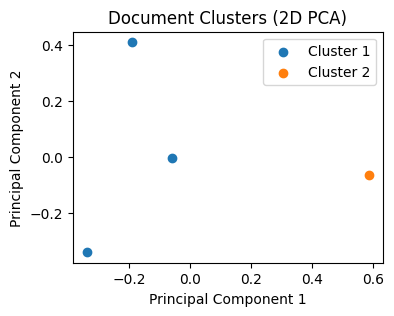

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Function to load GloVe embeddings
glove_embeddings = {}
with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            glove_embeddings[word] = coefs

# Function to calculate document embeddings
def document_embedding(doc, embeddings_index):
    words = doc.split()
    word_embeddings = [embeddings_index.get(word, np.zeros(embeddings_index['a'].shape)) for word in words]
    doc_embedding = np.mean(word_embeddings, axis=0)
    return doc_embedding


# Sample documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Calculate document embeddings
document_vectors = [document_embedding(doc, glove_embeddings) for doc in documents]

# Perform K-means clustering
num_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(document_vectors)
clusters = kmeans.labels_

# Print clusters
for i in range(num_clusters):
    cluster_docs = [documents[j] for j in range(len(documents)) if clusters[j] == i]
    print(f'Cluster {i+1}:')
    for doc in cluster_docs:
        print(doc)
    print()

# Optionally, print documents in each cluster
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    for i, doc in enumerate(documents):
        if clusters[i] == cluster_id:
            print(doc)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)  # 2 principal components for 2D visualization
document_embeddings_2d = pca.fit_transform(document_vectors)

# Plot document clusters
plt.figure(figsize=(4,3))
for i in range(num_clusters):
    cluster_docs = np.array([document_embeddings_2d[j] for j in range(len(documents)) if clusters[j] == i])
    plt.scatter(cluster_docs[:, 0], cluster_docs[:, 1], label=f'Cluster {i+1}')
plt.title('Document Clusters (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# FastText Embeddings

**Document Clustering**: FastText embeddings facilitate document clustering tasks by capturing the semantic similarity between documents. This enables grouping similar documents together, which is useful in various applications such as organizing news articles, customer reviews, or academic papers.

**Machine Translation**: FastText embeddings are employed in machine translation systems to improve translation quality, especially for translating languages with complex morphology or a high degree of inflection. By capturing subword information, FastText embeddings help handle rare or unseen words effectively.

**Recommendation Systems**: FastText embeddings can be utilized in recommendation systems to model user preferences and item similarities. They enable the system to understand the semantics of user-item interactions, leading to more personalized and accurate recommendations.
